In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from genetic_program import FitnessFunction
from gp_artemis import ExperimentManager
from IPython.core.display import HTML, Javascript
from chart_plotter import DogeDNACanvas

%matplotlib inline
pd.set_option('display.max_columns', 500)

class WowFitnessFunction(FitnessFunction):
    _name = "ff_sowow"

    def compute(self, individual, evaluation, genetic_program):
        return evaluation.profit_percent * evaluation.num_sells,

class BenchmarkDiffFitnessFunction(FitnessFunction):
    _name = "ff_benchmarkdiff"

    def compute(self, individual, evaluation, genetic_program):
        return evaluation.profit_percent - evaluation.benchmark_backtest.profit_percent,

class BenchmarkDiff2FitnessFunction(FitnessFunction):
    _name = "ff_benchmarkdiff2"

    def compute(self, individual, evaluation, genetic_program):
        return (evaluation.profit_percent - evaluation.benchmark_backtest.profit_percent)*evaluation.num_profitable_trades,
    
    
experiment_json = {
    "training_data": [
        {
        "transaction_currency": "OMG",
        "counter_currency": "BTC",
        "start_time": "2018/04/01 00:00:00 UTC",
        "end_time": "2018/06/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        },
        {
        "transaction_currency": "DOGE",
        "counter_currency": "BTC",
        "start_time": "2018/04/01 00:00:00 UTC",
        "end_time": "2018/06/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        },
        {
        "transaction_currency": "ETH",
        "counter_currency": "BTC",
        "start_time": "2018/04/01 00:00:00 UTC",
        "end_time": "2018/06/01 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
        }
    ],

    "validation_data": [{
        "transaction_currency": "OMG",
        "counter_currency": "BTC",
        "start_time": "2018/03/01 00:00:00 UTC",
        "end_time": "2018/03/31 00:00:00 UTC",
        "resample_period": 60,
        "source": 0
    }],

    "fitness_function": "ff_benchmarkdiff",
    "grammar_version": "gv3",
    "num_generations": 3,

    "mating_probabilities": [
        0.9
    ],

    "mutation_probabilities": [
        0.5
    ],

    "population_sizes": [
        500
    ]
}

e = ExperimentManager(experiment_json, read_from_file=False)
e.run_experiments(display_results=False)


INFO:root:>>> Variant run_evolution.data_OMG-BTC-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-ETH-BTC-1522540800.0-1527811200.0;grammar_gv3;fitness_ff_benchmarkdiff;x_0.9;m_0.5;n_500;gen_3 already has completed records, skipping...


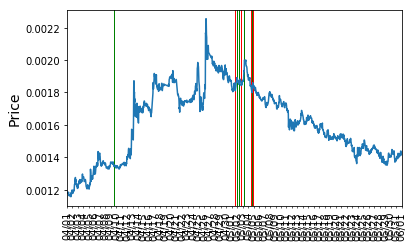

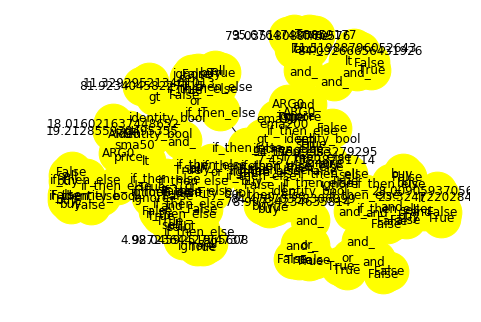

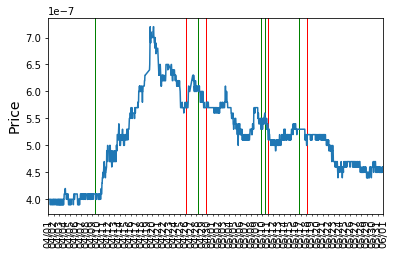

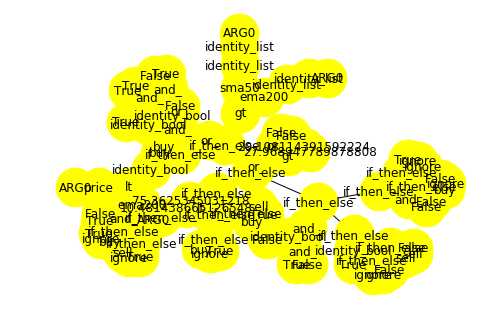

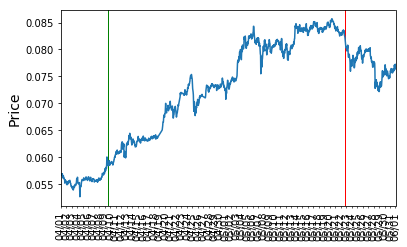

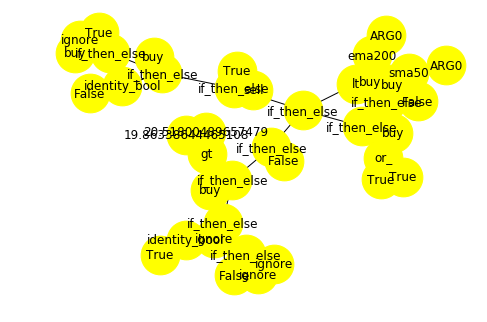

In [2]:
performance_dfs = e.analyze_all_datasets()

Best performing individual across datasets in variant Experiment run_evolution.data_OMG-BTC-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-ETH-BTC-1522540800.0-1527811200.0;grammar_gv3;fitness_ff_benchmarkdiff;x_0.9;m_0.5;n_500;gen_3:



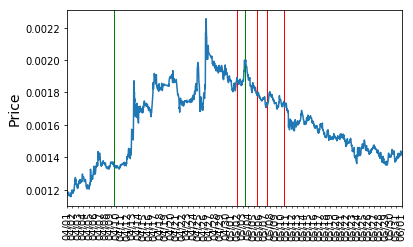

String representation:
if_then_else(False, if_then_else(gt(19.86338644465108, 20.51800489657479), if_then_else(identity_bool(True), ignore, if_then_else(False, ignore, ignore)), buy), if_then_else(lt(ema200(ARG0), sma50(ARG0)), if_then_else(or_(True, True), if_then_else(False, buy, buy), buy), if_then_else(True, sell, if_then_else(identity_bool(False), buy, if_then_else(True, ignore, buy)))))



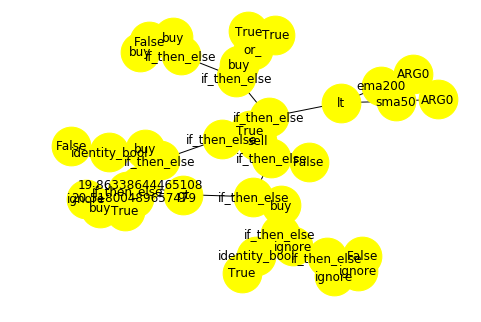

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 14:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance -> 743110.859476 OMG 	 (1 OMG = 0.00134233 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 14:00:00 rsi_value=None
2018-05-02 00:00:00  	 OrderType.SELL   	 cash_balance ->       1392.64 BTC 	 currency_balance -> -743110.859476 OMG 	 (1 OMG = 0.00187877 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-05-02 00:00:00 rsi_value=None
2018-05-03 10:00:00  	 OrderType.BUY    	 cash_balance ->      -1392.64 BTC 	 currency_balance -> 702239.139491 OMG 	 (1 OMG = 0.00197819 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-05-03 10:00:00 rsi_value=None
2018-05-05 15:00:00  	 OrderType.SELL   	 cash_balance ->       1254.45 BTC 	 currenc

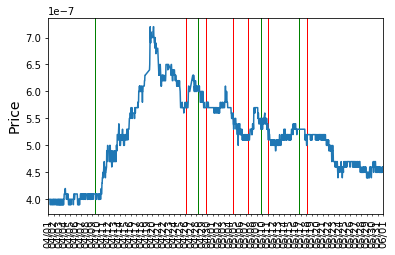

String representation:
if_then_else(False, if_then_else(gt(19.86338644465108, 20.51800489657479), if_then_else(identity_bool(True), ignore, if_then_else(False, ignore, ignore)), buy), if_then_else(lt(ema200(ARG0), sma50(ARG0)), if_then_else(or_(True, True), if_then_else(False, buy, buy), buy), if_then_else(True, sell, if_then_else(identity_bool(False), buy, if_then_else(True, ignore, buy)))))



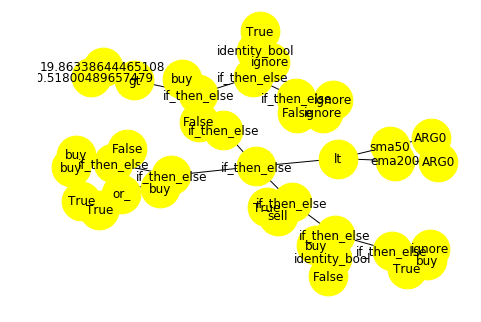

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 14:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance -> 2432926829.268293 DOGE 	 (1 DOGE = 0.00000041 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 14:00:00 rsi_value=None
2018-04-26 03:00:00  	 OrderType.SELL   	 cash_balance ->       1383.30 BTC 	 currency_balance -> -2432926829.268293 DOGE 	 (1 DOGE = 0.00000057 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-04-26 03:00:00 rsi_value=None
2018-04-28 09:00:00  	 OrderType.BUY    	 cash_balance ->      -1383.30 BTC 	 currency_balance -> 2299738530.868903 DOGE 	 (1 DOGE = 0.00000060 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-28 09:00:00 rsi_value=None
2018-04-29 16:00:00  	 OrderType.SELL   	 cash_balance ->       130

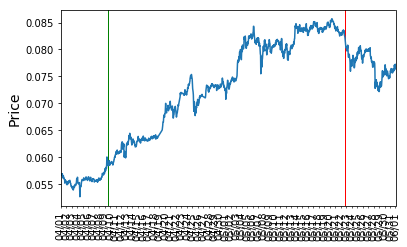

String representation:
if_then_else(False, if_then_else(gt(19.86338644465108, 20.51800489657479), if_then_else(identity_bool(True), ignore, if_then_else(False, ignore, ignore)), buy), if_then_else(lt(ema200(ARG0), sma50(ARG0)), if_then_else(or_(True, True), if_then_else(False, buy, buy), buy), if_then_else(True, sell, if_then_else(identity_bool(False), buy, if_then_else(True, ignore, buy)))))



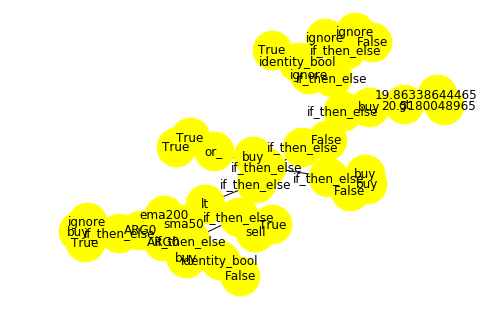

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 14:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance ->  17026.993118 ETH 	 (1 ETH = 0.05858345 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 14:00:00 rsi_value=None
2018-05-22 17:00:00  	 OrderType.SELL   	 cash_balance ->       1402.51 BTC 	 currency_balance -> -17026.993118 ETH 	 (1 ETH = 0.08257639 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-05-22 17:00:00 rsi_value=None
End time: 2018-06-01 00:00:00

Summary
--
Number of trades: 2
End cash: 1402.51 BTC
End crypto: 0.000000 ETH
End price: 0.07682501
Total value invested: 1000 BTC
Total value after investment: 1402.51 BTC (+40.25%)
Profit: 402.51 BTC
Total value invested: 6920000.00 USDT (conversion on 2018-04-01 00:00:00)
Total value after investment: 10497806.

In [4]:
best_individuals_across_variants_and_datasets = e.get_best_performing_across_datasets()

In [5]:
performance_dfs[0]

,abc_negative_cache_version,alpha,benchmark_profit_percent,benchmark_profit_percent_usdt,beta,buy_currency,cash,counter_currency,crypto,current_price,current_timestamp,end_cash,end_crypto,end_crypto_currency,end_price,end_time,end_value,end_value_usdt,evaluate_profit_on_last_order,evaluation,experiment_id,hof_ranking,individual,max_buy_sell_pair_gain,max_buy_sell_pair_loss,max_buy_sell_pair_return,max_drawdown,max_drawdown_duration,mean_buy_sell_pair_gain,mean_buy_sell_pair_loss,mean_buy_sell_pair_return,min_buy_sell_pair_gain,min_buy_sell_pair_loss,min_buy_sell_pair_return,num_buy_sell_pairs,num_buys,num_gains,num_losses,num_orders,num_profitable_trades,num_sells,num_trades,num_unprofitable_trades,percent_profitable_trades,profit,profit_percent,profit_percent_usdt,profit_usdt,resample_period,sharpe_ratio,slippage,source,start_cash,start_crypto,start_time,start_value,start_value_usdt,std_buy_sell_pair_gain,std_buy_sell_pair_loss,std_buy_sell_pair_return,time_delay,transaction_cost_percent,transaction_currency,verbose
5,54,0.035707,4.871004,16.756165,0.775559,OMG,1266.975643,BTC,0.0,0.001415,1.527811e+09,1266.975643,0.0,OMG,0.001415,1.527811e+09,1266.975643,9.483313e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,5,[<deap.gp.Primitive object at 0x000001B7E99879...,0.353673,-0.013884,0.353673,-0.265256,723060.0,0.186960,-0.024193,0.060268,0.020247,-0.041724,-0.041724,5,5,2,3,10,2,5,10,3,0.400000,266.975643,26.697564,37.042091,2.563313e+06,60,0.335646,0,0,1000,0,1.522541e+09,1000,6920000.0,0.166713,0.012460,0.148024,0,0.0025,OMG,False
6,54,0.035707,4.871004,16.756165,0.775559,OMG,1266.975643,BTC,0.0,0.001415,1.527811e+09,1266.975643,0.0,OMG,0.001415,1.527811e+09,1266.975643,9.483313e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,6,[<deap.gp.Primitive object at 0x000001B7E99879...,0.353673,-0.013884,0.353673,-0.265256,723060.0,0.186960,-0.024193,0.060268,0.020247,-0.041724,-0.041724,5,5,2,3,10,2,5,10,3,0.400000,266.975643,26.697564,37.042091,2.563313e+06,60,0.335646,0,0,1000,0,1.522541e+09,1000,6920000.0,0.166713,0.012460,0.148024,0,0.0025,OMG,False
7,54,0.035707,4.871004,16.756165,0.775559,OMG,1266.975643,BTC,0.0,0.001415,1.527811e+09,1266.975643,0.0,OMG,0.001415,1.527811e+09,1266.975643,9.483313e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,7,[<deap.gp.Primitive object at 0x000001B7E99879...,0.353673,-0.013884,0.353673,-0.265256,723060.0,0.186960,-0.024193,0.060268,0.020247,-0.041724,-0.041724,5,5,2,3,10,2,5,10,3,0.400000,266.975643,26.697564,37.042091,2.563313e+06,60,0.335646,0,0,1000,0,1.522541e+09,1000,6920000.0,0.166713,0.012460,0.148024,0,0.0025,OMG,False
0,54,0.034208,4.871004,16.756165,0.770606,OMG,1256.140534,BTC,0.0,0.001415,1.527811e+09,1256.140534,0.0,OMG,0.001415,1.527811e+09,1256.140534,9.402212e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,0,[<deap.gp.Primitive object at 0x000001B7E99879...,0.396134,-0.000574,0.396134,-0.253257,953460.0,0.201541,-0.048772,0.076384,0.006948,-0.096971,-0.096971,4,4,2,2,8,2,4,8,2,0.500000,256.140534,25.614053,35.870114,2.482212e+06,60,0.326885,0,0,1000,0,1.522541e+09,1000,6920000.0,0.194593,0.048199,0.189101,0,0.0025,OMG,False
1,54,0.034208,4.871004,16.756165,0.770606,OMG,1256.140534,BTC,0.0,0.001415,1.527811e+09,1256.140534,0.0,OMG,0.001415,1.527811e+09,1256.140534,9.402212e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,1,[<deap.gp.Primitive object at 0x000001B7E99879...,0.396134,-0.000574,0.396134,-0.253257,953460.0,0.201541,-0.048772,0.076384,0.006948,-0.096971,-0.096971,4,4,2,2,8,2,4,8,2,0.500000,256.140534,25.614053,35.870114,2.482212e+06,60,0.326885,0,0,1000,0,1.522541e+09,1000,6920000.0,0.194593,0.048199,0.189101,0,0.0025,OMG,False
2,54,0.034208,4.871004,16.756165,0.770606

In [6]:
performance_dfs[1]

,abc_negative_cache_version,alpha,benchmark_profit_percent,benchmark_profit_percent_usdt,beta,buy_currency,cash,counter_currency,crypto,current_price,current_timestamp,end_cash,end_crypto,end_crypto_currency,end_price,end_time,end_value,end_value_usdt,evaluate_profit_on_last_order,evaluation,experiment_id,hof_ranking,individual,max_buy_sell_pair_gain,max_buy_sell_pair_loss,max_buy_sell_pair_return,max_drawdown,max_drawdown_duration,mean_buy_sell_pair_gain,mean_buy_sell_pair_loss,mean_buy_sell_pair_return,min_buy_sell_pair_gain,min_buy_sell_pair_loss,min_buy_sell_pair_return,num_buy_sell_pairs,num_buys,num_gains,num_losses,num_orders,num_profitable_trades,num_sells,num_trades,num_unprofitable_trades,percent_profitable_trades,profit,profit_percent,profit_percent_usdt,profit_usdt,resample_period,sharpe_ratio,slippage,source,start_cash,start_crypto,start_time,start_value,start_value_usdt,std_buy_sell_pair_gain,std_buy_sell_pair_loss,std_buy_sell_pair_return,time_delay,transaction_cost_percent,transaction_currency,verbose
3,54,0.032463,11.634848,24.286563,0.449315,DOGE,1261.578652,BTC,0.0,4.600000e-07,1.527811e+09,1261.578652,0.0,DOGE,4.600000e-07,1.527811e+09,1261.578652,9.442916e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,3,[<deap.gp.Primitive object at 0x000001B7EA531B...,0.386768,-0.020972,0.386768,-0.292152,2462400.0,0.210606,-0.037830,0.061545,0.034444,-0.052375,-0.052375,5,5,2,3,10,2,5,10,3,0.400000,261.578652,26.157865,36.458327,2.522916e+06,60,0.334442,0,0,1000,0,1.522541e+09,1000,6920000.0,0.176162,0.012924,0.165307,0,0.0025,DOGE,False
4,54,0.032463,11.634848,24.286563,0.449315,DOGE,1261.578652,BTC,0.0,4.600000e-07,1.527811e+09,1261.578652,0.0,DOGE,4.600000e-07,1.527811e+09,1261.578652,9.442916e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,4,[<deap.gp.Primitive object at 0x000001B7EA531B...,0.386768,-0.020972,0.386768,-0.292152,2462400.0,0.210606,-0.037830,0.061545,0.034444,-0.052375,-0.052375,5,5,2,3,10,2,5,10,3,0.400000,261.578652,26.157865,36.458327,2.522916e+06,60,0.334442,0,0,1000,0,1.522541e+09,1000,6920000.0,0.176162,0.012924,0.165307,0,0.0025,DOGE,False
8,54,0.032463,11.634848,24.286563,0.449315,DOGE,1261.578652,BTC,0.0,4.600000e-07,1.527811e+09,1261.578652,0.0,DOGE,4.600000e-07,1.527811e+09,1261.578652,9.442916e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,8,[<deap.gp.Primitive object at 0x000001B7EA531B...,0.386768,-0.020972,0.386768,-0.292152,2462400.0,0.210606,-0.037830,0.061545,0.034444,-0.052375,-0.052375,5,5,2,3,10,2,5,10,3,0.400000,261.578652,26.157865,36.458327,2.522916e+06,60,0.334442,0,0,1000,0,1.522541e+09,1000,6920000.0,0.176162,0.012924,0.165307,0,0.0025,DOGE,False
9,54,0.032463,11.634848,24.286563,0.449315,DOGE,1261.578652,BTC,0.0,4.600000e-07,1.527811e+09,1261.578652,0.0,DOGE,4.600000e-07,1.527811e+09,1261.578652,9.442916e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,9,[<deap.gp.Primitive object at 0x000001B7EA531B...,0.386768,-0.020972,0.386768,-0.292152,2462400.0,0.210606,-0.037830,0.061545,0.034444,-0.052375,-0.052375,5,5,2,3,10,2,5,10,3,0.400000,261.578652,26.157865,36.458327,2.522916e+06,60,0.334442,0,0,1000,0,1.522541e+09,1000,6920000.0,0.176162,0.012924,0.165307,0,0.0025,DOGE,False
0,54,0.031654,11.634848,24.286563,0.454884,DOGE,1256.621187,BTC,0.0,4.600000e-07,1.527811e+09,1256.621187,0.0,DOGE,4.600000e-07,1.527811e+09,1256.621187,9.405810e+06,True,<backtester_ticks.TickDrivenBacktester object ...,run_evolution.data_OMG-BTC-1522540800.0-152781...,0,[<deap.gp.Primitive object at 0x000001B7EA531B...,0.386768,-0.020972,0.386768,-0.294934,2462400.0,0.139821,-0.037830,0.050996,0.015636,-0.052375,-0.052375,6,6,3,3,12,3,6,12,3,0.500000,256.621187,25.662119,35.922104,2.485810e+06,60,0.329164,0,0,1000,0,1.522541e+09,1000,6920000.0,0.174619,0.012924,0

Experiment id: run_evolution.data_OMG-BTC-1522540800.0-1527811200.0-DOGE-BTC-1522540800.0-1527811200.0-ETH-BTC-1522540800.0-1527811200.0;grammar_gv3;fitness_ff_benchmarkdiff;x_0.9;m_0.5;n_500;gen_3

String representation:
if_then_else(identity_bool(and_(and_(or_(True, True), and_(False, False)), and_(lt(23.32472202842798, 28.009059370560788), and_(True, False)))), if_then_else(and_(and_(lt(71.51988796052643, 84.09266656431926), and_(False, True)), and_(lt(95.67647483859177, 73.03518089770576), and_(True, True))), if_then_else(or_(identity_bool(False), or_(False, False)), if_then_else(lt(84.47870358306899, 78.99734234635814), if_then_else(True, sell, sell), if_then_else(True, buy, buy)), if_then_else(or_(False, True), if_then_else(False, ignore, sell), if_then_else(True, sell, buy))), if_then_else(and_(and_(False, True), or_(False, True)), if_then_else(and_(False, False), if_then_else(False, sell, buy), if_then_else(False, buy, buy)), if_then_else(identity_bool(False), if_then_else(True

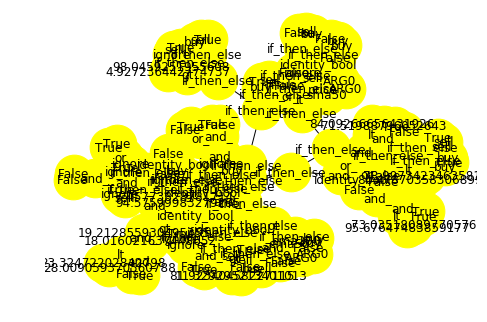

Backtesting report:
--

* Order execution log *

Start balance: cash = 1000 BTC, crypto = 0 
Start time: 2018-04-01 00:00:00
--
--
2018-04-09 14:00:00  	 OrderType.BUY    	 cash_balance ->      -1000.00 BTC 	 currency_balance -> 743110.859476 OMG 	 (1 OMG = 0.00134233 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-04-09 14:00:00 rsi_value=None
2018-05-01 17:00:00  	 OrderType.SELL   	 cash_balance ->       1350.29 BTC 	 currency_balance -> -743110.859476 OMG 	 (1 OMG = 0.00182163 BTC ), slippage = 0.00
   signal: genetic_down strength=3 trend=-1 horizon=None timestamp=2018-05-01 17:00:00 rsi_value=None
2018-05-02 01:00:00  	 OrderType.BUY    	 cash_balance ->      -1350.29 BTC 	 currency_balance -> 718307.697763 OMG 	 (1 OMG = 0.00187512 BTC ), slippage = 0.00
   signal: genetic_up strength=3 trend=1 horizon=None timestamp=2018-05-02 01:00:00 rsi_value=None
2018-05-02 07:00:00  	 OrderType.SELL   	 cash_balance ->       1328.21 BTC 	 currenc

In [7]:
best = e.performance_df_row_info(performance_dfs[0].iloc[0])
best_overall = best_individuals_across_variants_and_datasets[0]

In [8]:
doge = DogeDNACanvas(best_overall,"container")
HTML(doge.create_container())

In [9]:
Javascript(doge.show())

<IPython.core.display.Javascript object>

### Random thoughts
* perhaps a great doge baby would be found in more generations
* when the market is bearish, some top performing strategies produce no trades (bug or feature?)
* in bullish markets, we see babies that sell and then buy again immediately - unrealistic
* keep reseeding initial population until some individual with good fitness is found 
* alternative: seed initial population with good individuals (e.g. RSI strategy, etc.) 
* compress babies by evaluating expressions within them (for instance 'if False')
* overfitting should be solved by evaluating babies over different time periods / currencies?
